## Seinfeld - main_chars
**Program:** 02_seinfeld_main_chars.ipynb <br>
**Created by:** Chris Chan<br>
**Date:** Feb 16, 2021<br>
**Purpose:** 
. Note: This workbook was similar to 01 programs<br>
. This looks primarily at the main chars (jerry, george, elaine, kramer)<br>
. The focus was to look at topic modeling scenarios. None of the graphs/results make it into the presention.and # of mentions per character<br>
. 1. bring in data, count vectorize, etc. <br>
. 2. preprocessing - clean, lemmatize <br>
. 3. explore different Topic Model scenarios for main chars only<br>
. level of analysis - character per episode

<br>
**Key Features:** 

**Key sites:**<br>
https://letstalkdata.com/2013/06/web-scraping-and-corpus-analysis-with-python-a-seinfeld-case-study/


In [110]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import NMF

In [111]:
import glob
import os
from collections import defaultdict
import re
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

In [112]:
import nltk
import os
import spacy
import re
import string
import pickle
from itertools import cycle
import matplotlib.pyplot as plt
from nltk import stem
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
from nltk.tokenize import word_tokenize, sent_tokenize, MWETokenizer
from gensim import corpora, models, similarities, matutils
from sklearn.decomposition import TruncatedSVD, NMF
from corextopic import corextopic, vis_topic
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import plotly.graph_objects as go

In [113]:
# def processFile(filename):
#     f = open(filename, 'r')
#     content = f.read()
#     content = re.sub('[^A-z \n]','',content)
#     return content.split()

**We read through all the docments and build a list-of-list of words:**

In [114]:
df = pd.read_csv('/Users/chrischan/Documents/02_Class/Metis/bootcamp/githubrepo/Metis_proj4/data/seinfeld_scripts_clean2.csv')

In [115]:
df.head()

,character,text,episodeno,seid,season
0,JERRY,Do you know what this is all about? Do you kno...,1,S01E01,1
1,JERRY,"(pointing at Georges shirt) See, to me, that b...",1,S01E01,1
2,GEORGE,Are you through?,1,S01E01,1
3,JERRY,"You do of course try on, when you buy?",1,S01E01,1
4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",1,S01E01,1


In [116]:
for text in df["text"][0:10]:
    print(text)

Do you know what this is all about? Do you know, why were here? To be out, this is out and out is one of the single most enjoyable experiences of life. People did you ever hear people talking about We should go out? This is what theyre talking about this whole thing, were all out now, no one is home. Not one person here is home, were all out! There are people tryin to find us, they dont know where we are. (on an imaginary phone) Did you ring?, I cant find him. Where did he go? He didnt tell me where he was going. He must have gone out. You wanna go out you get ready, you pick out the clothes, right? You take the shower, you get all ready, get the cash, get your friends, the car, the spot, the reservation Then youre standing around, whatta you do? You go We gotta be getting back. Once youre out, you wanna get back! You wanna go to sleep, you wanna get up, you wanna go out again tomorrow, right? Where ever you are in life, its my feeling, youve gotta go.
(pointing at Georges shirt) See, 

## Data Cleaning

In [117]:
breaks = lambda x: re.sub("\n", " ", x)
alphanumeric = lambda x: re.sub("\w*\d\w*", "", x)
punc_lower = lambda x: re.sub("[%s]" % re.escape(string.punctuation), "", x.lower())

In [118]:
df["textmod"] = df["text"].map(breaks).map(alphanumeric).map(punc_lower)
df["character"] = df["character"].str.lower()

In [119]:
df

,character,text,episodeno,seid,season,textmod
0,jerry,Do you know what this is all about? Do you kno...,1,S01E01,1,do you know what this is all about do you know...
1,jerry,"(pointing at Georges shirt) See, to me, that b...",1,S01E01,1,pointing at georges shirt see to me that butto...
2,george,Are you through?,1,S01E01,1,are you through
3,jerry,"You do of course try on, when you buy?",1,S01E01,1,you do of course try on when you buy
4,george,"Yes, it was purple, I liked it, I dont actuall...",1,S01E01,1,yes it was purple i liked it i dont actually r...
...,...,...,...,...,...,...
54593,jerry,Grand theft auto - don't steal any of my jokes.,23,S09E23,9,grand theft auto dont steal any of my jokes
54594,prisoner 3,You suck - I'm gonna cut you.,23,S09E23,9,you suck im gonna cut you
54595,jerry,"Hey, I don't come down to where you work, and ...",23,S09E23,9,hey i dont come down to where you work and kno...
54596,guard,"Alright, Seinfeld, that's it. Let's go. Come on.",23,S09E23,9,alright seinfeld thats it lets go come on


**Attach char to each line if/when summarizing to episode**

In [120]:
df["episodetext"] = df['character']+": "+df["textmod"] 
df.head()

,character,text,episodeno,seid,season,textmod,episodetext
0,jerry,Do you know what this is all about? Do you kno...,1,S01E01,1,do you know what this is all about do you know...,jerry: do you know what this is all about do y...
1,jerry,"(pointing at Georges shirt) See, to me, that b...",1,S01E01,1,pointing at georges shirt see to me that butto...,jerry: pointing at georges shirt see to me tha...
2,george,Are you through?,1,S01E01,1,are you through,george: are you through
3,jerry,"You do of course try on, when you buy?",1,S01E01,1,you do of course try on when you buy,jerry: you do of course try on when you buy
4,george,"Yes, it was purple, I liked it, I dont actuall...",1,S01E01,1,yes it was purple i liked it i dont actually r...,george: yes it was purple i liked it i dont ac...


In [121]:
def tprint(data,var,nobs):
    for text in data[var][0:nobs]:
        print(text)

In [122]:
tprint(df,"episodetext",10)
# for text in df["episodetext"][0:10]:
#     print(text)

jerry: do you know what this is all about do you know why were here to be out this is out and out is one of the single most enjoyable experiences of life people did you ever hear people talking about we should go out this is what theyre talking about this whole thing were all out now no one is home not one person here is home were all out there are people tryin to find us they dont know where we are on an imaginary phone did you ring i cant find him where did he go he didnt tell me where he was going he must have gone out you wanna go out you get ready you pick out the clothes right you take the shower you get all ready get the cash get your friends the car the spot the reservation then youre standing around whatta you do you go we gotta be getting back once youre out you wanna get back you wanna go to sleep you wanna get up you wanna go out again tomorrow right where ever you are in life its my feeling youve gotta go
jerry: pointing at georges shirt see to me that button is in the wor

**Stop Words**

we want to remove all speaker names that show up at any time

**Skip for now**

In [123]:
chars1 =df.character.unique()
ch_list = chars1.tolist()

In [124]:
type(ch_list)

list

In [125]:
ch_list

['jerry',
 'george',
 'claire',
 'claie',
 '(george shows his note-block to jerry; it says very largely',
 'kessler',
 'kramer',
 'laura',
 'laura & jerry',
 'george & jerry',
 'audience',
 'elaine',
 'woman',
 'pamela',
 'guests, jerry & elaine',
 'vanessa',
 'roger',
 'morty',
 'helen',
 'helen & morty',
 'jerry & george',
 'carol',
 'uncle mac',
 'artie',
 'policeman',
 'george ',
 'both',
 'larry',
 'diane',
 'man #1',
 'man #2',
 'jerry, george & elaine',
 'joel',
 'waitress',
 'jerry and joel',
 'customer',
 'teller',
 'jerry & elaine',
 'stock boy',
 'jerry ',
 'kramer ',
 'dry cleaner',
 'dry cleane',
 'marlene',
 'receptionist',
 'jerry¬ís message',
 'uncle leo',
 'manya',
 'manya ',
 'isaac',
 'eulogist',
 'nephew',
 'elaine ',
 'salesman',
 'alton',
 'benes',
 'manager',
 'donna',
 'donna ',
 'harold',
 'manny',
 'roxanne',
 'rita',
 'joanne',
 'stan',
 'susie',
 'janice',
 'rava',
 'ray',
 'elaine & ray',
 'man',
 'levitan',
 'vic',
 'glenda',
 'dan',
 'bill',
 'ava',
 'gre

In [126]:
rem = str.maketrans('', '', '\@#%&[]();:-""''+,.`*/...')
ch_list2 = [s.translate(rem) for s in ch_list]
ch_list2

['jerry',
 'george',
 'claire',
 'claie',
 'george shows his noteblock to jerry it says very largely',
 'kessler',
 'kramer',
 'laura',
 'laura  jerry',
 'george  jerry',
 'audience',
 'elaine',
 'woman',
 'pamela',
 'guests jerry  elaine',
 'vanessa',
 'roger',
 'morty',
 'helen',
 'helen  morty',
 'jerry  george',
 'carol',
 'uncle mac',
 'artie',
 'policeman',
 'george ',
 'both',
 'larry',
 'diane',
 'man 1',
 'man 2',
 'jerry george  elaine',
 'joel',
 'waitress',
 'jerry and joel',
 'customer',
 'teller',
 'jerry  elaine',
 'stock boy',
 'jerry ',
 'kramer ',
 'dry cleaner',
 'dry cleane',
 'marlene',
 'receptionist',
 'jerry¬ís message',
 'uncle leo',
 'manya',
 'manya ',
 'isaac',
 'eulogist',
 'nephew',
 'elaine ',
 'salesman',
 'alton',
 'benes',
 'manager',
 'donna',
 'donna ',
 'harold',
 'manny',
 'roxanne',
 'rita',
 'joanne',
 'stan',
 'susie',
 'janice',
 'rava',
 'ray',
 'elaine  ray',
 'man',
 'levitan',
 'vic',
 'glenda',
 'dan',
 'bill',
 'ava',
 'greeny',
 'newman'

In [127]:
ids = ",".join(ch_list2) 

In [128]:
type(ids)

str

In [129]:
ch_list3=ids.replace("'","")


In [130]:
ch_list3

'jerry,george,claire,claie,george shows his noteblock to jerry it says very largely,kessler,kramer,laura,laura  jerry,george  jerry,audience,elaine,woman,pamela,guests jerry  elaine,vanessa,roger,morty,helen,helen  morty,jerry  george,carol,uncle mac,artie,policeman,george ,both,larry,diane,man 1,man 2,jerry george  elaine,joel,waitress,jerry and joel,customer,teller,jerry  elaine,stock boy,jerry ,kramer ,dry cleaner,dry cleane,marlene,receptionist,jerry¬ís message,uncle leo,manya,manya ,isaac,eulogist,nephew,elaine ,salesman,alton,benes,manager,donna,donna ,harold,manny,roxanne,rita,joanne,stan,susie,janice,rava,ray,elaine  ray,man,levitan,vic,glenda,dan,bill,ava,greeny,newman,setting,tv voice,nurse 1,doctor,tor,driver,assistant,jerry and kramer,man in neighboring bed,tina,elaine  jerry,tabachnick,stewardess,leslie,mary,marry,restaurant manager bruce,elaine to jerry,jerry to george,bruce,jerry to elaine,george to jerry,george to guy,george whistles to guy on phone,elaine through her t

In [131]:
ch_list4 = ch_list3.split(",")

In [132]:
ch_list4

['jerry',
 'george',
 'claire',
 'claie',
 'george shows his noteblock to jerry it says very largely',
 'kessler',
 'kramer',
 'laura',
 'laura  jerry',
 'george  jerry',
 'audience',
 'elaine',
 'woman',
 'pamela',
 'guests jerry  elaine',
 'vanessa',
 'roger',
 'morty',
 'helen',
 'helen  morty',
 'jerry  george',
 'carol',
 'uncle mac',
 'artie',
 'policeman',
 'george ',
 'both',
 'larry',
 'diane',
 'man 1',
 'man 2',
 'jerry george  elaine',
 'joel',
 'waitress',
 'jerry and joel',
 'customer',
 'teller',
 'jerry  elaine',
 'stock boy',
 'jerry ',
 'kramer ',
 'dry cleaner',
 'dry cleane',
 'marlene',
 'receptionist',
 'jerry¬ís message',
 'uncle leo',
 'manya',
 'manya ',
 'isaac',
 'eulogist',
 'nephew',
 'elaine ',
 'salesman',
 'alton',
 'benes',
 'manager',
 'donna',
 'donna ',
 'harold',
 'manny',
 'roxanne',
 'rita',
 'joanne',
 'stan',
 'susie',
 'janice',
 'rava',
 'ray',
 'elaine  ray',
 'man',
 'levitan',
 'vic',
 'glenda',
 'dan',
 'bill',
 'ava',
 'greeny',
 'newman'

In [133]:
words = ['costanza','seinfeld','jerry','elaine','george','kramer','newman','morty','helen','frank','peterman','puddy','steinbrenner']
for word in list(words):  # iterating on a copy since removing will mess things up
    if word in ch_list4:
        ch_list4.remove(word)

In [134]:
ch_list4

['claire',
 'claie',
 'george shows his noteblock to jerry it says very largely',
 'kessler',
 'laura',
 'laura  jerry',
 'george  jerry',
 'audience',
 'woman',
 'pamela',
 'guests jerry  elaine',
 'vanessa',
 'roger',
 'helen  morty',
 'jerry  george',
 'carol',
 'uncle mac',
 'artie',
 'policeman',
 'george ',
 'both',
 'larry',
 'diane',
 'man 1',
 'man 2',
 'jerry george  elaine',
 'joel',
 'waitress',
 'jerry and joel',
 'customer',
 'teller',
 'jerry  elaine',
 'stock boy',
 'jerry ',
 'kramer ',
 'dry cleaner',
 'dry cleane',
 'marlene',
 'receptionist',
 'jerry¬ís message',
 'uncle leo',
 'manya',
 'manya ',
 'isaac',
 'eulogist',
 'nephew',
 'elaine ',
 'salesman',
 'alton',
 'benes',
 'manager',
 'donna',
 'donna ',
 'harold',
 'manny',
 'roxanne',
 'rita',
 'joanne',
 'stan',
 'susie',
 'janice',
 'rava',
 'ray',
 'elaine  ray',
 'man',
 'levitan',
 'vic',
 'glenda',
 'dan',
 'bill',
 'ava',
 'greeny',
 'setting',
 'tv voice',
 'nurse 1',
 'doctor',
 'tor',
 'driver',
 'ass

Since we want to look at episode level we can include names as stopwords

**Resume**

In [135]:
from sklearn.feature_extraction import text 
#chars = ['seinfeld','jerry','elaine','george','kramer','newman','morty','helen','frank','peterman','puddy','steinbrenner']
my_stop_words = nltk.corpus.stopwords.words('english')
#my_stop_words.extend(chars) #text.ENGLISH_STOP_WORDS.union(chars)
#my_stop_words.extend(ch_list4)

In [136]:
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [137]:
df.head()
#tprint(df,"textmod2",10)

,character,text,episodeno,seid,season,textmod,episodetext
0,jerry,Do you know what this is all about? Do you kno...,1,S01E01,1,do you know what this is all about do you know...,jerry: do you know what this is all about do y...
1,jerry,"(pointing at Georges shirt) See, to me, that b...",1,S01E01,1,pointing at georges shirt see to me that butto...,jerry: pointing at georges shirt see to me tha...
2,george,Are you through?,1,S01E01,1,are you through,george: are you through
3,jerry,"You do of course try on, when you buy?",1,S01E01,1,you do of course try on when you buy,jerry: you do of course try on when you buy
4,george,"Yes, it was purple, I liked it, I dont actuall...",1,S01E01,1,yes it was purple i liked it i dont actually r...,george: yes it was purple i liked it i dont ac...


## Lemmatize

In [138]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
spacy_lemmatize = lambda x: " ".join([token.lemma_ for token in nlp(x)])

In [139]:
df["lemmatized"] = df["textmod"].apply(spacy_lemmatize)
df

,character,text,episodeno,seid,season,textmod,episodetext,lemmatized
0,jerry,Do you know what this is all about? Do you kno...,1,S01E01,1,do you know what this is all about do you know...,jerry: do you know what this is all about do y...,do you know what this be all about do you know...
1,jerry,"(pointing at Georges shirt) See, to me, that b...",1,S01E01,1,pointing at georges shirt see to me that butto...,jerry: pointing at georges shirt see to me tha...,point at george shirt see to I that button be ...
2,george,Are you through?,1,S01E01,1,are you through,george: are you through,be you through
3,jerry,"You do of course try on, when you buy?",1,S01E01,1,you do of course try on when you buy,jerry: you do of course try on when you buy,you do of course try on when you buy
4,george,"Yes, it was purple, I liked it, I dont actuall...",1,S01E01,1,yes it was purple i liked it i dont actually r...,george: yes it was purple i liked it i dont ac...,yes it be purple I like it I do nt actually re...
...,...,...,...,...,...,...,...,...
54593,jerry,Grand theft auto - don't steal any of my jokes.,23,S09E23,9,grand theft auto dont steal any of my jokes,jerry: grand theft auto dont steal any of my ...,grand theft auto do nt steal any of my joke
54594,prisoner 3,You suck - I'm gonna cut you.,23,S09E23,9,you suck im gonna cut you,prisoner 3: you suck im gonna cut you,you suck I m gon na cut you
54595,jerry,"Hey, I don't come down to where you work, and ...",23,S09E23,9,hey i dont come down to where you work and kno...,jerry: hey i dont come down to where you work ...,hey I do nt come down to where you work and kn...
54596,guard,"Alright, Seinfeld, that's it. Let's go. Come on.",23,S09E23,9,alright seinfeld thats it lets go come on,guard: alright seinfeld thats it lets go come on,alright seinfeld that s it let go come on


## Doc: Character, Episode Level

Create 2 separate ds: 1 with speaker and 1 without speaker

1. with speaker

In [140]:
df_sp = df.copy()

## Doc: Episode Level
df_sp = df_sp.drop(['text','textmod','episodeno','lemmatized','season'],axis=1)
# concatenate the string 
df_sp['episodetext'] = df_sp.groupby(['seid','character'])['episodetext'].transform(lambda x : ' '.join(x)) 

# drop duplicate data 
df_sp = df_sp.drop_duplicates()
  
# show the dataframe 
print(df_sp) 

                                               character    seid  \
0                                                  jerry  S01E01   
2                                                 george  S01E01   
8                                                 claire  S01E01   
47                                                 claie  S01E01   
52     (george shows his note-block to jerry; it says...  S01E01   
...                                                  ...     ...   
54561                                            foreman  S09E23   
54567                                              puddy  S09E23   
54588                                         prisoner 1  S09E23   
54590                                         prisoner 2  S09E23   
54592                                         prisoner 3  S09E23   

                                             episodetext  
0      jerry: do you know what this is all about do y...  
2      george: are you through george: yes it was pur...  
8     

2. without speaker and removing pronouns 

In [141]:
df_nosp = df.copy()

## Doc: Episode Level
df_nosp = df_nosp.drop(['text','textmod','episodetext','episodeno','season'],axis=1)
# concatenate the string 
df_nosp['lemmatized'] = df_nosp.groupby(['seid','character'])['lemmatized'].transform(lambda x : ' '.join(x)) 

# drop duplicate data 
df_nosp = df_nosp.drop_duplicates()
  
# show the dataframe 
print(df_nosp) 

                                               character    seid  \
0                                                  jerry  S01E01   
2                                                 george  S01E01   
8                                                 claire  S01E01   
47                                                 claie  S01E01   
52     (george shows his note-block to jerry; it says...  S01E01   
...                                                  ...     ...   
54561                                            foreman  S09E23   
54567                                              puddy  S09E23   
54588                                         prisoner 1  S09E23   
54590                                         prisoner 2  S09E23   
54592                                         prisoner 3  S09E23   

                                              lemmatized  
0      do you know what this be all about do you know...  
2      be you through yes it be purple I like it I do...  
8     

Use the above for topic modeling (df_nosp)

## Keep Main Characters only

In [142]:
main_chars=['costanza','seinfeld','jerry','elaine','george','kramer','cosmo']

In [143]:
# main 4 chars
df_main = df_nosp.loc[df_nosp["character"].isin(main_chars)]

In [144]:
df_main

,character,seid,lemmatized
0,jerry,S01E01,do you know what this be all about do you know...
2,george,S01E01,be you through yes it be purple I like it I do...
144,kramer,S01E01,do you handle any of that commercial real esta...
215,elaine,S01E01,coccoon ii the return I guess they do nt like ...
557,jerry,S01E02,so I move into the centre lane now I get ahead...
...,...,...,...
53573,kramer,S09E20,you know my friend bob saccamano make a fortun...
53885,george,S09E23,I ca nt eat this without catsup would it kill ...
53886,jerry,S09E23,I know what you mean its like go out with some...
53912,kramer,S09E23,hey jojo no thank you so what be you do come o...


## Topic Modeling

## Automate Topic Modeling

**Trying to udnerstand components of each vectorizer first**

**Define Pipeline**

Let's try defining a pipeline for LMF and word checking

In [145]:
class topic_model():

    def __init__(sein, data, vectorizer, model, num_topics  ):
        sein.data = data
        sein.vectorizer = vectorizer
        sein.model = model
        sein.num_topics = num_topics 
        

    # count vectorize
    def vectorize(sein):
        if sein.vectorizer == "cv":
            if sein.model == "corex":
                vec = CountVectorizer(stop_words=my_stop_words,  max_df=maxdf, min_df=mindf, binary=True) 
            else:
                vec = CountVectorizer(stop_words=my_stop_words,  max_df=maxdf ) #,min_df=mindf ngram_range=(1, 3)) 
        elif sein.vectorizer == "tfidf":
            vec = TfidfVectorizer(stop_words=my_stop_words,  max_df=maxdf, min_df=mindf ) #ngram_range=(1, 3),
        else: print("Please define a valid vectorizer.")

        # Fit transform doc word to doc topic        
        sein.doc_word = vec.fit_transform(sein.data)
        # vec is your count vectorizer. these are bag of words
        sein.feature_names = vec.get_feature_names()
        # putting all feature names into an array
        sein.words = list(np.asarray(vec.get_feature_names()))
        # transform sparse mat to dict
        sein.corpus = matutils.Sparse2Corpus(sein.doc_word.transpose())
        sein.id2word = dict((v, k) for k, v in vec.vocabulary_.items())
        
        
        xportwfreq(sein.corpus)
        xportwords(sein.id2word)

    def display_topics(sein):
        if sein.model == "lda":
            model = models.LdaModel(corpus=sein.corpus, num_topics=sein.num_topics, id2word=sein.id2word, passes=5, random_state=42)
            topics = model.print_topics()
            print(topics)
            
        elif sein.model == "corex":
            model = corextopic.Corex(n_hidden=sein.num_topics, words=sein.words, seed=1, max_iter=500)
            model.fit(sein.doc_word, words=sein.words, docs=sein.data)
            topics = model.get_topics()
            print(topics)
            for n,topic in enumerate(topics):
                topic_words,_ = zip(*topic)
            print('{}: '.format(n) + ','.join(topic_words))

        else:
            if sein.model == "lsa":
                model = TruncatedSVD(sein.num_topics)
            elif sein.model == "nmf":
                model = NMF(sein.num_topics)
            else: print("Please define a valid model.")

            doc_topic = model.fit_transform(sein.doc_word)
            
            # components are # of labels
            for ix, topic in enumerate(model.components_):
                print("\nTopic ", ix)
                print(", ".join([sein.feature_names[i] for i in topic.argsort()[:-30:-1]]))

        

Pipeline function

In [146]:
def pipeline(data, vectorizer, model, num_topics):
    x = topic_model(data, vectorizer, model, num_topics)
    x.vectorize()
    x.display_topics()

## Convert DF to data for modeling

In [147]:
data = df_main["lemmatized"]

In [235]:
data.shape

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(687,)

**Add more stopwords**

In [149]:
stopadd=['alright', 'okay', 'shes', 'hi', 'ha', 'hello', 'ah', 'ha',
         'hello', 'ah', 'huh', 'ok', 'wanna', 'told', 'still','uh',
         'ya', 'mr','dyou', 'um','uhm','whatre', 'cmon', 'ho', 'em','yea','hu',
        'bo','indicating','ykonw','seinfeld', 'yeah','im','gonna',
        'ive', 'theyre', 'said','gotta','lets','say','cars']
my_stop_words.extend(stopadd)

recurring words: cars, keys, tickets, apratment, food, characters, money, places, business ideas?, clothing, coffee

Looks like the themes are really just drawing out the episodes that had the most unique topics - they may not generalize across all episodes<br>
<br>
Rare words are good but some are so specific to the episode (ie. yadayada, names, pigman, etc.). We may want to tone down the rare words and look for more common words across episodes

**lets see if we can add more stopwords**

In [150]:
# Visualise using word cloud
from wordcloud import WordCloud
import matplotlib as plt
import matplotlib.pyplot as plt

# remove stopwords 

def wcloud(data):
    df_cloud = df_nosp.copy()
    #df_cloud["textmod"] = df_nosp.drop([[my_stop_words]],axis=1)
    df_cloud['textmod']=df_nosp['textmod'].apply(lambda x: ' '.join([item for item in x.split() if item not in my_stop_words]))

    split_title = [x.split(" ") for x in df_cloud['textmod'].astype(str)]
    big_list = []
    for x in split_title:
        big_list.extend(x)

    listCounts = pd.Series(big_list).value_counts()
    listCounts.to_csv('listcounts.csv')


    # wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
    #         random_state=1).generate((listCounts[listCounts > 2]).to_string())
    # plt.figure(figsize=(15, 15))
    # plt.imshow(wordcloud, interpolation="bilinear")
    # plt.axis("off")
    # plt.show()

In [151]:
stopadd2 = ['know','oh','well','dont','like','get','hey','right','youre','thats','got','go','think','see','going',
'one','really','cant','want','hes','good','back','ill','look','come','tell','could','yes','would','didnt',
'take','little','something','whats','time','mean','never','thing','theres','way','make','maybe','people',
'anything','call','give','sure','big']

my_stop_words.extend(stopadd2)

On the surface seems there's some separation but not sure what the topics are.
Using separation at groups of 6 and max_df at 0.9. If we bump to groups of 10 there are a couple of semi-discernable groupings like food, parents, daily living, relationships...

Simple Funcionts

In [152]:
def vectorize(data, vectorizer, binary):
    if vectorizer == "cv":
        if binary == True:
            vec = CountVectorizer(stop_words=my_stop_words,  binary=True) #ngram_range=(1, 2),
        else:
            vec = CountVectorizer(stop_words=my_stop_words ) #ngram_range=(1, 2)
    elif vectorizer == "tfidf":
        vec = TfidfVectorizer(stop_words=my_stop_words) #, ngram_range=(1, 2)

    doc_word = vec.fit_transform(data)
    feature_names = vec.get_feature_names()
    id2word = dict((v, k) for k, v in vec.vocabulary_.items())
    
    return doc_word, feature_names, id2word

In [189]:
def lsa(doc_word, feature_names, num_topics):
    model = TruncatedSVD(num_topics)
    doc_topic = model.fit_transform(doc_word)
    for ix, topic in enumerate(model.components_):
        print("\nTopic ", ix)
        print(", ".join([feature_names[i] for i in topic.argsort()[:-21:-1]]))

def nmf(doc_word, feature_names, num_topics):
    model = NMF(num_topics)
    doc_topic = model.fit_transform(doc_word)
    for ix, topic in enumerate(model.components_):
        print("\nTopic ", ix)
        print(", ".join([feature_names[i] for i in topic.argsort()[:-30:-1]]))

def lda(doc_word, feature_names, id2word, num_topics):
    corpus = matutils.Sparse2Corpus(doc_word.transpose())
    model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=5, random_state=42)
    topics = model.print_topics(num_words=20)
    for n, topic in topics:
        print("\nTopic ", n)
        print(topic)
        
def corex(doc_word, feature_names, num_topics):
    words = list(np.asarray(feature_names))
    model = corextopic.Corex(n_hidden=num_topics, words=words, seed=1, max_iter=200)
    model.fit(doc_word, words=words, docs=data) # where data = df["Lemmatized"]
    topics = model.get_topics()
    for n,topic in enumerate(topics):
        topic_words,_ = zip(*topic)
        print('{}: '.format(n) + ','.join(topic_words))

In [154]:
stopadd=['nt', 'na', 'gon na', 'gon', 'ca', 'ca nt','ta',  'chunnel']
my_stop_words.extend(stopadd)

### LDA with min_df
Set min_df in countvectorizer excluding strong terms that show up a few times


In [155]:
def vectorize_2(data, min_df,max_df):
    vec = CountVectorizer(stop_words=my_stop_words,  min_df=min_df , max_df=max_df) #ngram_range=(1, 3)
    doc_word = vec.fit_transform(data)
    feature_names = vec.get_feature_names()
    id2word = dict((v, k) for k, v in vec.vocabulary_.items())
    
    return doc_word, feature_names, id2word

In [156]:
stopadd = ['whos','wheres','always','youve','everything','door','isnt','feel','coming','five','please','ask','find','enters','room','happened','sorry','god','nice','ever','thought','talking','looking','hands','doesnt','looks','better','believe','saw','kind',
          'whatever', 'whenever', 'whered', 'wheres','aah', 'able', 'absolutely', 'accept', 'ahh','answer', 'answering', 'answers','anyway', 'anywhere', 'cause', 'certain', 'certainly', 'chair','changed'] 
stopadd2 = ['four','pause','costanza','hundred','thousand','front','side','behind','ago','ten,','six','twenty','high','set','mine',
          'test','sue','number','hard','mrs','goin','anybody','la','eh','wednesday','saturday','de','anymore','enter','become','ten','key','cosmo']

my_stop_words.extend(stopadd)


In [157]:
stopadd=['leave','thank','hear','happen','wha','sit','place','name','move','try','use','walk','yknow','paper','someone',
         'laugh','start','stop','hand']
my_stop_words.extend(stopadd)

In [158]:
my_stop_words.extend(stopadd2)

**remove character names**

In [159]:
stopadd=['jerry','george','elaine','kramer']
my_stop_words.extend(stopadd)

In [161]:
doc_word, feature_names, id2word= vectorize_2(data,.03,.75)
lda(doc_word, feature_names, id2word, 25)


Topic  21
0.016*"hair" + 0.014*"wait" + 0.012*"work" + 0.011*"let" + 0.011*"sell" + 0.010*"shirt" + 0.010*"coat" + 0.008*"guy" + 0.008*"point" + 0.008*"new" + 0.008*"buy" + 0.008*"minute" + 0.008*"another" + 0.007*"need" + 0.007*"cake" + 0.007*"two" + 0.007*"show" + 0.007*"hold" + 0.007*"around" + 0.007*"great"

Topic  1
0.015*"talk" + 0.014*"guy" + 0.014*"let" + 0.011*"man" + 0.011*"newman" + 0.009*"even" + 0.009*"put" + 0.009*"eat" + 0.009*"phone" + 0.008*"two" + 0.008*"great" + 0.007*"much" + 0.007*"idea" + 0.007*"need" + 0.007*"friend" + 0.006*"show" + 0.006*"bad" + 0.006*"whole" + 0.006*"listen" + 0.006*"watch"

Topic  16
0.026*"guy" + 0.014*"card" + 0.013*"let" + 0.013*"pick" + 0.012*"put" + 0.012*"suit" + 0.011*"friend" + 0.011*"wait" + 0.010*"buy" + 0.010*"book" + 0.009*"need" + 0.009*"listen" + 0.009*"read" + 0.009*"problem" + 0.008*"idea" + 0.008*"minute" + 0.008*"even" + 0.008*"talk" + 0.007*"work" + 0.007*"kid"

Topic  22
0.021*"work" + 0.020*"guy" + 0.017*"day" + 0.015*"m

## Nouns only

In [162]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [239]:
df_nouns = data.copy()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [240]:
df_nouns.shape

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(687,)

In [258]:
df_nouns = pd.DataFrame(df_main['lemmatized'].apply(nouns))
df_nouns

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,lemmatized
0,experience life people people thing one person...
2,yes button microphone uh time orange indicator...
144,estate hi hey morty dress quo word word word q...
215,coccoon return re everything oh parent think g...
557,lane woman reason side finger thing finger per...
...,...
53573,friend bob saccamano fortune see idea rubber b...
53885,catsup thing s everything anything thing excus...
53886,someone something people movie movie movie tod...
53912,hey thank let beach day something air today so...


## Convert Nouns DF to Data for modeling


In [259]:
data_nouns = df_nouns["lemmatized"]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [260]:
stopadd=['man','let','guy','day']
my_stop_words.extend(stopadd)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**AT 0.03, .65 and 6 words - we get some higher weights**

In [261]:
stopadd=['line','piece','morning','tomorrow','stuff','hour','person','year','bit','water','week','point,','minute',
        'course','today','life','fact','dollar','somebody','turn','anyone','talk','nothing','matter','everyone','word']
my_stop_words.extend(stopadd)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [327]:
doc_word, feature_names, id2word= vectorize_2(data_nouns,.02,.85)
lda(doc_word, feature_names, id2word, 12)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topic  0
0.057*"car" + 0.027*"phone" + 0.018*"woman" + 0.016*"house" + 0.014*"deal" + 0.014*"idea" + 0.012*"game" + 0.012*"lot" + 0.011*"party" + 0.011*"boy" + 0.010*"tv" + 0.010*"parent" + 0.009*"hell" + 0.009*"date" + 0.009*"friend" + 0.008*"street" + 0.008*"book" + 0.008*"head" + 0.007*"cable" + 0.007*"space"

Topic  1
0.038*"hair" + 0.031*"suit" + 0.025*"show" + 0.017*"joke" + 0.017*"cake" + 0.014*"dentist" + 0.012*"table" + 0.012*"head" + 0.011*"arm" + 0.011*"party" + 0.011*"phone" + 0.010*"car" + 0.010*"cookie" + 0.010*"fun" + 0.010*"store" + 0.009*"tape" + 0.009*"mom" + 0.009*"golf" + 0.009*"toe" + 0.009*"excuse"

Topic  2
0.028*"ticket" + 0.025*"friend" + 0.017*"phone" + 0.015*"sex" + 0.013*"movie" + 0.013*"head" + 0.012*"woman" + 0.011*"apartment" + 0.011*"step" + 0.011*"home" + 0.010*"bowl" + 0.009*"game" + 0.009*"doctor" + 0.009*"business" + 0.008*"card" + 0.008*"bag" + 0.008*"boy" + 0.008*"mind" + 0.008*"money" + 0.008*"change"

Topic  3
0.033*"show" + 0.021*"idea" + 0.020

## NMF with min/max df

In [265]:
stopadd=['night','cheque','world','wait','situation','problem','jon','sir','watch','list','oclock','hm','helloooo',
         'point','work','outta','ooh','yesterday','question','whatta']
my_stop_words.extend(stopadd)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [266]:
doc_word, feature_names, id2word= vectorize_2(data_nouns,.001,.85)
nmf(doc_word, feature_names,  12)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topic  0
phone, hell, house, bye, voice, card, business, lane, pitt, girl, vandelay, friend, game, apartment, plane, job, message, street, industry, van, pick, act, office, bathroom, cannon, hold, busboy, listen, home

Topic  1
car, space, drake, lot, reservation, party, spot, block, hell, voight, park, street, driver, parking, pigman, head, drive, city, card, garage, friend, tv, club, father, deal, pop, wine, note, pencil

Topic  2
woman, date, friend, robbin, lot, relationship, oppenheim, bennet, taft, idea, job, button, girl, game, dryer, cottonball, head, building, shirt, face, bathroom, pamela, sagman, bag, book, elevator, office, interview, sex

Topic  3
show, idea, tv, character, business, story, party, deal, salsa, woman, meeting, table, butler, toilet, drake, store, friend, home, everybody, writer, box, closet, seltzer, order, marla, job, plane, guide, son

Topic  4
ticket, coat, mother, movie, dressing, fur, stub, bowl, sex, bania, drycleane, suit, gift, label, dinner, maker

**min_df=0.3, max_df=0.85<br>
Topic 0: everday life: eat, sleep, dating, movies, relationships, sex<br>
Topic 1: incidents with cars<br>
Topic 2: parents, traveling<br>
Topic 3: apartment life, neighbors, incidents<br>
Topic 4: jerry/george show, entertainment, odd jobs<br>
TOpic 5: ideas kramer, business, odd incidents<br>
Topic 6: food**

## Doc_Topic Matrix

In [267]:
def nmf_dt(doc_word, feature_names, num_topics):
    model = NMF(num_topics)
    doc_topic = model.fit_transform(doc_word)
    for ix, topic in enumerate(model.components_):
        print("\nTopic ", ix)
        print(", ".join([feature_names[i] for i in topic.argsort()[:-75:-1]]))
    return model, doc_topic

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [268]:
def lda_dt(doc_word, feature_names, id2word, dictionary, num_topics):
    corpus = matutils.Sparse2Corpus(doc_word.transpose())
    model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=5, random_state=42)
    topics = model.print_topics()
    for n, topic in topics:
        print("\nTopic ", n)
        print(topic)

    return model, corpus

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [269]:
doc_word, feature_names, id2word, dictionary = vectorize_vis(data_nouns, 0.001,0.85)
nmf_model, doc_topic = nmf_dt(doc_word, feature_names, 12)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topic  0
phone, voice, hell, house, movie, bye, card, business, pitt, girl, lane, vandelay, plane, message, job, street, bathroom, game, industry, office, apartment, pick, van, friend, act, cannon, hold, busboy, tony, listen, pant, conversation, home, leg, joke, mind, sport, machine, end, excuse, fight, lot, pay, gesture, idea, story, click, face, statue, hair, baseball, play, cordless, ball, meeting, flight, yogurt, fault, lunch, vest, worry, ring, pilot, airport, part, restaurant, drive, break, television, sub, alarm, boyfriend, mouth, tractor

Topic  1
car, space, drake, reservation, party, lot, spot, block, hell, voight, park, street, parking, driver, pigman, card, drive, city, garage, tv, head, club, father, friend, deal, pop, wine, pencil, doubt, note, insurance, community, bag, bless, blender, window, woody, ambulance, help, damage, blood, pig, nobody, arm, roll, buck, store, wheelchair, estimate, hospital, gift, alarm, wire, pretzel, golf, flyer, fish, dentist, sweedler, baby,

In [270]:
doc_topic

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[4.97326997e-01, 6.95134259e-01, 5.23136566e+00, ...,
        4.39441979e-01, 0.00000000e+00, 0.00000000e+00],
       [8.62886202e-02, 0.00000000e+00, 1.47071788e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.85129642e-03, ...,
        5.81903203e-04, 0.00000000e+00, 8.61375956e-03],
       ...,
       [6.79235618e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.46434632e-01, 0.00000000e+00],
       [3.33332961e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.44554822e-02, 1.02567577e-01],
       [4.77634948e-02, 8.92849352e-03, 0.00000000e+00, ...,
        7.98771540e-02, 3.00375308e-02, 1.20570931e-01]])

In [ ]:
# doc_word, feature_names, id2word, dictionary = vectorize_vis(data, 0.20,0.65)

# lda_model, corpus = lda_dt(doc_word, feature_names, id2word, dictionary, 4)

### Change all LDA to NMF

In [271]:
df_new = pd.DataFrame(df_main)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [272]:
df_new['season'] = df_nosp['seid'].astype(str).str[0:3]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [273]:
df_new['topic']=doc_topic.argmax(axis=1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [274]:
df_new

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,character,seid,lemmatized,season,topic
0,jerry,S01E01,do you know what this be all about do you know...,S01,2
2,george,S01E01,be you through yes it be purple I like it I do...,S01,2
144,kramer,S01E01,do you handle any of that commercial real esta...,S01,11
215,elaine,S01E01,coccoon ii the return I guess they do nt like ...,S01,9
557,jerry,S01E02,so I move into the centre lane now I get ahead...,S01,11
...,...,...,...,...,...
53573,kramer,S09E20,you know my friend bob saccamano make a fortun...,S09,1
53885,george,S09E23,I ca nt eat this without catsup would it kill ...,S09,3
53886,jerry,S09E23,I know what you mean its like go out with some...,S09,3
53912,kramer,S09E23,hey jojo no thank you so what be you do come o...,S09,3


In [275]:
df_new.to_csv('nmf_topics.csv')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [276]:
df_new.topic.value_counts()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


11    220
2      85
1      66
6      64
3      58
0      50
5      41
4      37
9      29
10     23
7       9
8       5
Name: topic, dtype: int64

**NMF count topics by season**

In [277]:
df_new

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,character,seid,lemmatized,season,topic
0,jerry,S01E01,do you know what this be all about do you know...,S01,2
2,george,S01E01,be you through yes it be purple I like it I do...,S01,2
144,kramer,S01E01,do you handle any of that commercial real esta...,S01,11
215,elaine,S01E01,coccoon ii the return I guess they do nt like ...,S01,9
557,jerry,S01E02,so I move into the centre lane now I get ahead...,S01,11
...,...,...,...,...,...
53573,kramer,S09E20,you know my friend bob saccamano make a fortun...,S09,1
53885,george,S09E23,I ca nt eat this without catsup would it kill ...,S09,3
53886,jerry,S09E23,I know what you mean its like go out with some...,S09,3
53912,kramer,S09E23,hey jojo no thank you so what be you do come o...,S09,3


## Output dataframe with topics

In [342]:
def label_top(row):
    if row['topic'] == 0 :
        return 'topic 0: Episodes involving places (apt, rest)'
    elif row['topic'] == 1 :
        return 'topic 1: Episodes involving cars'
    elif row['topic'] == 2 :
        return 'topic 2: Dating, Relationships, Encounters'
    elif row['topic'] == 3 :
        return 'topic 3: Tv pilot, business, jobs'
    elif row['topic'] == 4 :
        return 'topic 4: Fashion, clothing, going out'
    elif row['topic'] == 5 :
        return 'topic 5: Business ideas, schemes'
    elif row['topic'] == 6 :
        return 'topic 6: Episodes involving money'
    elif row['topic'] == 7 :
        return 'topic 7: Childhood, family, travel'
    elif row['topic'] == 8 :
        return 'topic 8: Elaine, Puddy, Revenge'
    elif row['topic'] == 9 :
        return 'topic 9: Involving Family'
    elif row['topic'] == 10 :
        return 'topic 10: George, Susan, Marriage'
    elif row['topic'] == 11 :
        return 'topic 11: hospitals, anatomy'
    return 'Other'

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [345]:
df_new['topic_label']=df_new.apply(lambda row: label_top(row), axis=1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [346]:
df_new.to_csv('seinfeld_scripts_clean3.csv', index=False)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Group the topics to the season level

In [347]:
#drop_list = counter[counter['speaker'] == 'SEP'].index
#counter = counter.drop(drop_list)
df_nmf = df_new.copy()
df_nmf = df_new.drop(['seid','character'],axis=1)
df_nmf = df_nmf.groupby(['season','topic','topic_label'], as_index = False).count()
df_nmf
df_nmf = df_nmf.sort_values('topic', ascending= True)
df_nmf.columns = ['season','topic','topic_label','episode_count']
df_nmf = df_nmf.reset_index(drop = True)
df_nmf.iloc[:20]


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,season,topic,topic_label,episode_count
0,S01,0,"topic 0: Episodes involving places (apt, rest)",1
1,S07,0,"topic 0: Episodes involving places (apt, rest)",3
2,S06,0,"topic 0: Episodes involving places (apt, rest)",5
3,S05,0,"topic 0: Episodes involving places (apt, rest)",6
4,S09,0,"topic 0: Episodes involving places (apt, rest)",11
5,S04,0,"topic 0: Episodes involving places (apt, rest)",8
6,S03,0,"topic 0: Episodes involving places (apt, rest)",5
7,S08,0,"topic 0: Episodes involving places (apt, rest)",7
8,S02,0,"topic 0: Episodes involving places (apt, rest)",4
9,S02,1,topic 1: Episodes involving cars,3


In [348]:
df_nmf_wide = df_nmf.pivot("season","topic_label","episode_count")
df_nmf_wide

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


topic_label,"topic 0: Episodes involving places (apt, rest)","topic 10: George, Susan, Marriage","topic 11: Docs, hospitals, anatomy",topic 1: Episodes involving cars,"topic 2: Dating, Relationships, Encounters","topic 3: Tv pilot, business, jobs","topic 4: Fashion, clothing, going out","topic 5: Business ideas, schemes",topic 6: Episodes involving money,"topic 7: Childhood, family, travel","topic 8: Elaine, Puddy, Revenge",topic 9: Parents
season,,,,,,,,,,,,
S01,1.0,NaN,5.0,NaN,2.0,1.0,2.0,NaN,4.0,NaN,NaN,1.0
S02,4.0,4.0,19.0,3.0,3.0,3.0,NaN,2.0,6.0,2.0,NaN,1.0
S03,5.0,4.0,25.0,16.0,18.0,2.0,2.0,6.0,8.0,2.0,1.0,1.0
S04,8.0,NaN,20.0,6.0,12.0,22.0,12.0,4.0,8.0,1.0,NaN,1.0
S05,6.0,4.0,26.0,8.0,8.0,4.0,3.0,8.0,8.0,NaN,1.0,8.0
S06,5.0,4.0,22.0,12.0,14.0,4.0,8.0,4.0,11.0,1.0,1.0,2.0
S07,3.0,6.0,32.0,15.0,11.0,6.0,2.0,6.0,8.0,1.0,1.0,5.0
S08,7.0,NaN,39.0,1.0,9.0,6.0,6.0,7.0,8.0,1.0,NaN,4.0
S09,11.0,1.0,32.0,5.0,8.0,10.0,2.0,4.0,3.0,1.0,1.0,6.0


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


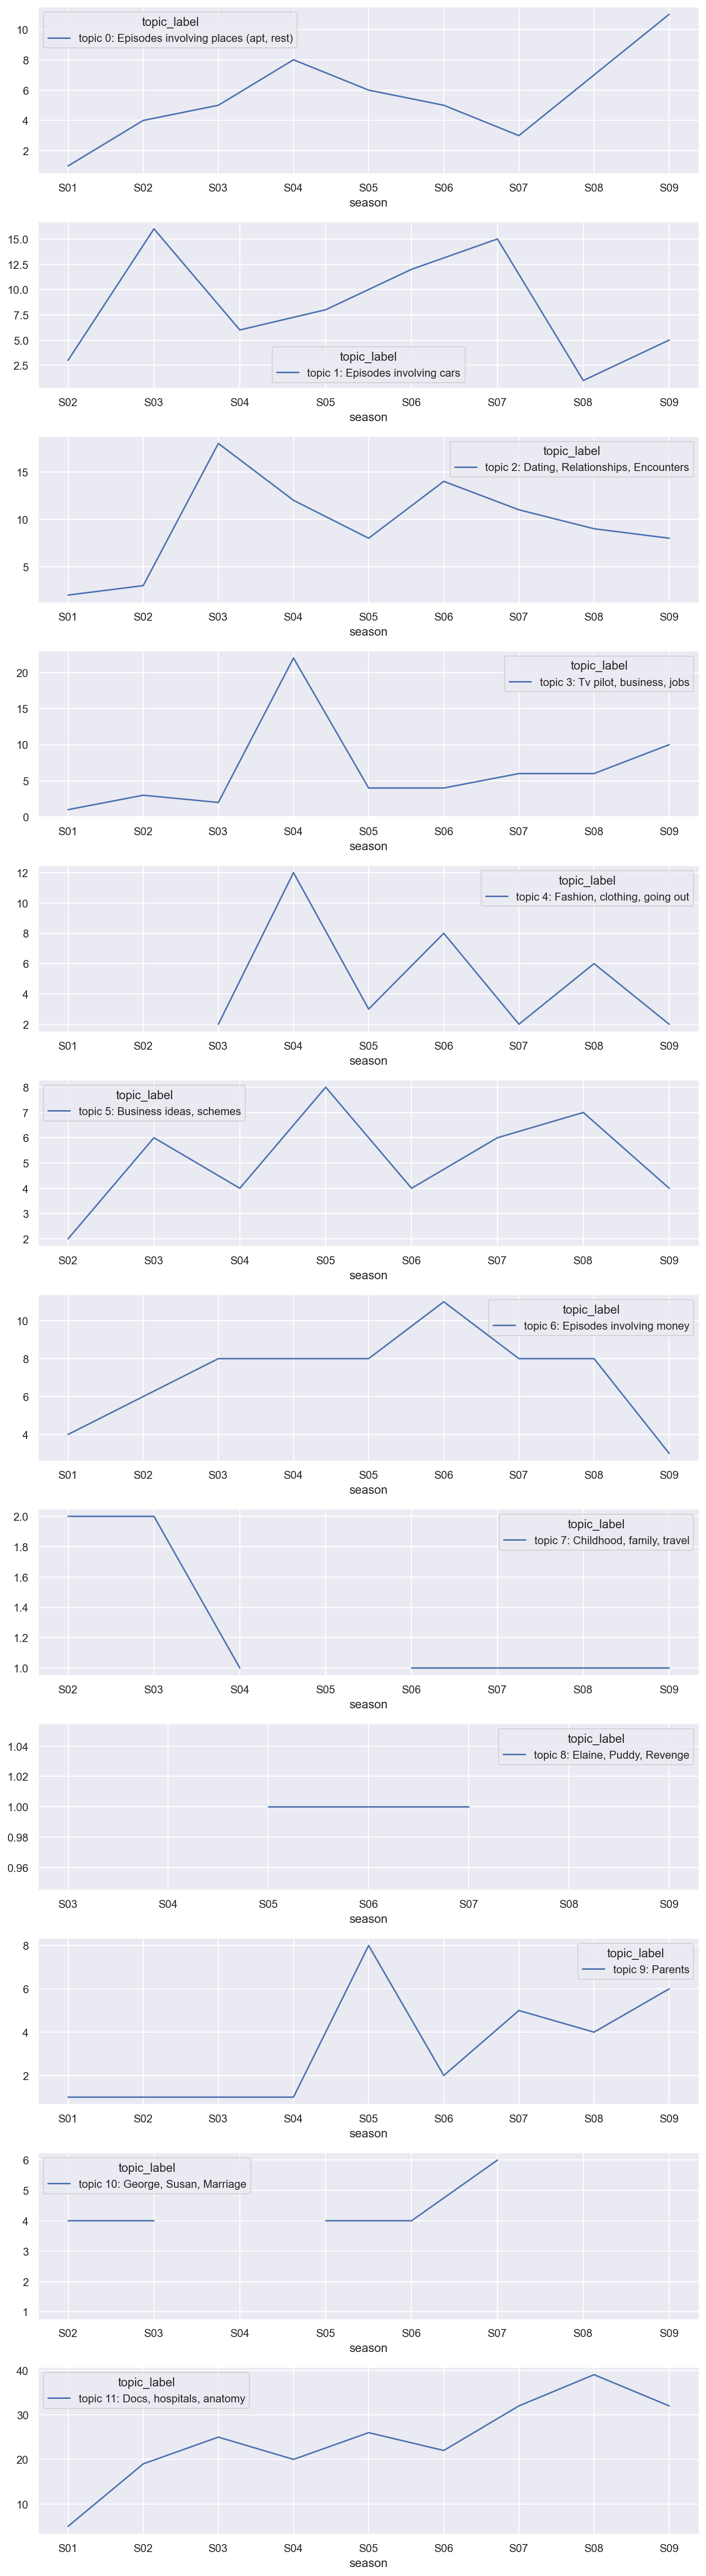

In [383]:
import seaborn as sns

fig, axes = plt.subplots(12, figsize=(10, 36))
#fig.suptitle('')

sns.lineplot(ax=axes[0], data=df_nmf_wide[['topic 0: Episodes involving places (apt, rest)']])
sns.lineplot(ax=axes[1], data=df_nmf_wide[['topic 1: Episodes involving cars']])
sns.lineplot(ax=axes[2], data=df_nmf_wide[['topic 2: Dating, Relationships, Encounters']])
sns.lineplot(ax=axes[3], data=df_nmf_wide[['topic 3: Tv pilot, business, jobs']])
sns.lineplot(ax=axes[4], data=df_nmf_wide[['topic 4: Fashion, clothing, going out']])
sns.lineplot(ax=axes[5], data=df_nmf_wide[['topic 5: Business ideas, schemes']])
sns.lineplot(ax=axes[6], data=df_nmf_wide[['topic 6: Episodes involving money']])
sns.lineplot(ax=axes[7], data=df_nmf_wide[['topic 7: Childhood, family, travel']])
sns.lineplot(ax=axes[8], data=df_nmf_wide[['topic 8: Elaine, Puddy, Revenge']])
sns.lineplot(ax=axes[9], data=df_nmf_wide[['topic 9: Parents']])
sns.lineplot(ax=axes[10], data=df_nmf_wide[['topic 10: George, Susan, Marriage']])
sns.lineplot(ax=axes[11], data=df_nmf_wide[['topic 11: Docs, hospitals, anatomy']])

#sns.set(rc={'figure.figsize':(12,6)})
#sns.color_palette("vlag", as_cmap=True)

#fig=plt.figure()
#ax = plt.subplot()

#sns.set_palette("Paired")
#sns.lineplot(data=df_nmf_wide)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('line_topmod_season.svg')
plt.show()


**look at word clouds for specific topics**

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'df_sent_wide' is not defined

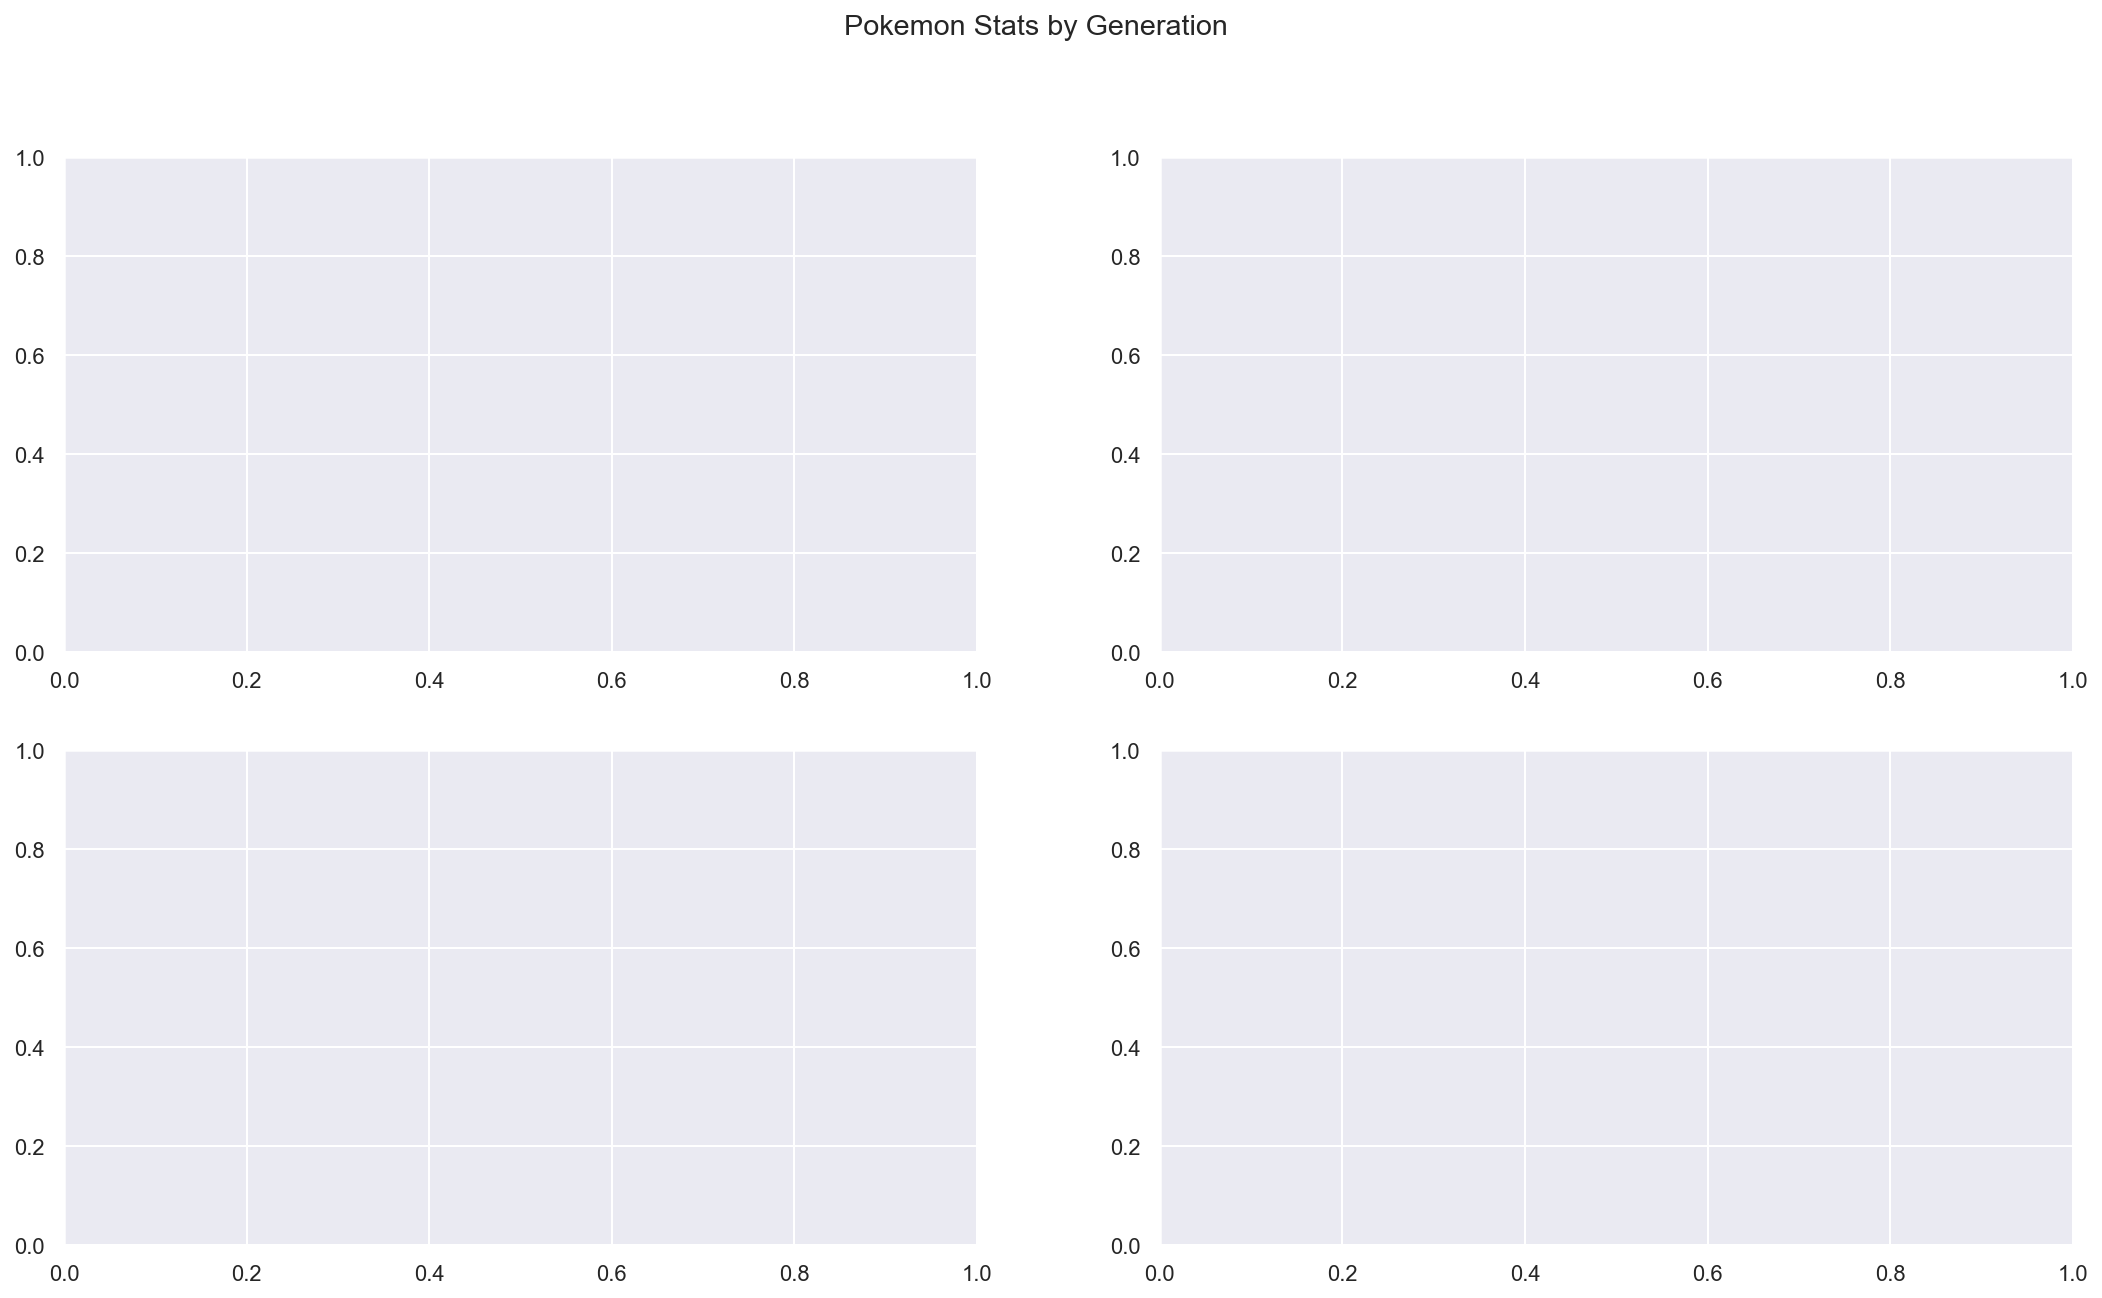

In [315]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

#fig.suptitle()

sns.scatterplot(ax=axes[0, 0], data=df_sent_wide[['jerry']])
sns.lineplot(ax=axes[0, 1], data=df_sent_wide[['george']])
sns.lineplot(ax=axes[1, 0], data=df_sent_wide[['kramer']])
sns.lineplot(ax=axes[1, 1], data=df_sent_wide[['elaine']])


sns.set(rc={'figure.figsize':(12,6)})
#sns.color_palette("vlag", as_cmap=True)

#fig=plt.figure()
#gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
#ax = plt.subplot()
#(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')

# a=sns.lineplot(data=df_sent_wide[50:75][['jerry']])
# b=sns.lineplot(data=df_sent_wide[50:75][['george']])
# c=sns.lineplot(data=df_sent_wide[50:75][['kramer']])
# d=sns.lineplot(data=df_sent_wide[50:75][['elaine']])

#fig.suptitle('Sharing x per column, y per row')

# ax1.plot(a)
# ax2.plot(b)
# ax3.plot(c)
# ax4.plot(d)

# for ax in axs.flat:
#     ax.label_outer()

sns.set_palette("magma")
#sns.lineplot(data=df_sent_wide[50:75][['george']])

# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(False)

plt.tight_layout()
plt.savefig('line_sent_episode.svg')
plt.show()

## Visualization: pyLDAvis 

In [208]:
from gensim.corpora.dictionary import Dictionary

def vectorize_vis(data, min_df,max_df):
    vec = CountVectorizer(stop_words=my_stop_words, min_df=min_df, max_df=max_df) #, ngram_range=(1, 3)
    doc_word = vec.fit_transform(data)
    feature_names = vec.get_feature_names()
    id2word = dict((v, k) for k, v in vec.vocabulary_.items())
    dictionary = Dictionary([feature_names])
    
    return doc_word, feature_names, id2word, dictionary

In [209]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

def lda_vis(doc_word, feature_names, id2word, dictionary, num_topics):
    corpus = matutils.Sparse2Corpus(doc_word.transpose())
    model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=5, random_state=42)    
    topics = model.print_topics(num_words=50)
    for n, topic in topics:
        print("\nTopic ", n)
        print(topic)

    vis_data = pyLDAvis.gensim.prepare(model, corpus, dictionary)
    return vis_data

In [210]:
doc_word, feature_names, id2word, dictionary = vectorize_vis(data_nouns, 0.02,.80)

vis_data = lda_vis(doc_word, feature_names, id2word, dictionary, 12)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['point'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '



Topic  0
0.142*"show" + 0.070*"business" + 0.069*"tv" + 0.043*"idea" + 0.038*"bag" + 0.035*"check" + 0.034*"meeting" + 0.032*"woman" + 0.027*"finger" + 0.024*"everybody" + 0.022*"work" + 0.021*"tonight" + 0.020*"lot" + 0.019*"boy" + 0.018*"air" + 0.017*"excuse" + 0.015*"point" + 0.015*"food" + 0.015*"friend" + 0.014*"money" + 0.013*"seat" + 0.013*"phone" + 0.011*"foot" + 0.010*"job" + 0.010*"eye" + 0.010*"story" + 0.010*"store" + 0.010*"joke" + 0.009*"home" + 0.009*"kid" + 0.008*"house" + 0.008*"date" + 0.008*"head" + 0.007*"nobody" + 0.007*"mind" + 0.007*"table" + 0.006*"face" + 0.006*"arm" + 0.006*"reason" + 0.006*"york" + 0.006*"order" + 0.005*"parent" + 0.005*"month" + 0.005*"ticket" + 0.005*"couple" + 0.005*"party" + 0.005*"relationship" + 0.005*"favor" + 0.005*"smile" + 0.005*"hell"

Topic  1
0.191*"movie" + 0.053*"trouble" + 0.050*"cab" + 0.043*"boy" + 0.038*"end" + 0.035*"friend" + 0.033*"eat" + 0.029*"hell" + 0.025*"favor" + 0.024*"food" + 0.022*"phone" + 0.022*"street" + 0.0

In [211]:
pyLDAvis.display(vis_data)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Values of lambda that are very close to zero will show terms that are more specific for a chosen topic. Meaning that you will see terms that are "important" for that specific topic but not necessarily "important" for the whole corpus.

Values of lambda that are very close to one will show those terms that have the highest ratio between frequency of the terms for that specific topic and the overall frequency of the terms from the corpus.


**The chart is intersting where we see still see some unnecessary terms but we also see some repetitive words across all episodes.
For example, dollar, mvie, sleep, bathroom, car, key, etc are common.
We may want to strip some of these just to see if there's anything else more unique about the episodes if we remove those basic themes<br>
<br>
It's also a bit difficult since each episode has multiple story lines that are sometimes not completely related. This may be hard to separate topics by episode**

In [ ]:
vis_data = lda_vis(doc_word, feature_names, id2word, dictionary, 4)

## Doc_Topic Matrix

In [ ]:
def nmf_dt(doc_word, feature_names, num_topics):
    model = NMF(num_topics)
    doc_topic = model.fit_transform(doc_word)
    for ix, topic in enumerate(model.components_):
        print("\nTopic ", ix)
        print(", ".join([feature_names[i] for i in topic.argsort()[:-75:-1]]))
    return model, doc_topic

In [ ]:
def lda_dt(doc_word, feature_names, id2word, dictionary, num_topics):
    corpus = matutils.Sparse2Corpus(doc_word.transpose())
    model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=5, random_state=42)
    topics = model.print_topics()
    for n, topic in topics:
        print("\nTopic ", n)
        print(topic)

    return model, corpus

In [ ]:
doc_word, feature_names, id2word, dictionary = vectorize_vis(data, 0.03,0.75)

nmf_model, doc_topic = nmf_dt(doc_word, feature_names, 7)


In [ ]:
# doc_word, feature_names, id2word, dictionary = vectorize_vis(data, 0.20,0.65)

# lda_model, corpus = lda_dt(doc_word, feature_names, id2word, dictionary, 4)

### Change all LDA to NMF

In [ ]:
df_new = pd.DataFrame(df_nosp)

In [ ]:
df_new['season'] = df_nosp['seid'].astype(str).str[0:3]

In [ ]:
df_new['topic']=doc_topic.argmax(axis=1)

In [ ]:
df_new

In [ ]:
df_new.to_csv('nmf_topics.csv')

In [ ]:
df_new.topic.value_counts()

**NMF count topics by season**

In [ ]:
df_new

In [ ]:
#drop_list = counter[counter['speaker'] == 'SEP'].index
#counter = counter.drop(drop_list)
df_nmf = df_new.copy()
df_nmf = df_new.drop(['seid'],axis=1)
df_nmf = df_nmf.groupby(['season','topic'], as_index = False).count()
df_nmf
df_nmf = df_nmf.sort_values('topic', ascending= True)
df_nmf.columns = ['season','topic','episode_count']
df_nmf = df_nmf.reset_index(drop = True)
df_nmf.iloc[:20]


**Set topics**

In [ ]:
def label_top(row):
    if row['topic'] == 0 :
        return '0: Everyday life (Non_apt)'
    elif row['topic'] == 1 :
        return '1: Car related'
    elif row['topic'] == 2 :
        return '2: Parents/Travel'
    elif row['topic'] == 3 :
        return '3: Apartment life'
    elif row['topic'] == 4 :
        return '4: Respective Jobs/Odd Jobs'
    elif row['topic'] == 5 :
        return '5: Food related'
    elif row['topic'] == 6 :
        return '6: Ideas/Business'
    return 'Other'

In [ ]:
df_nmf.apply(lambda row: label_top(row), axis=1)

In [ ]:
df_nmf['topic_label'] = df_nmf.apply(lambda row: label_top(row), axis=1)

In [ ]:
df_nmf_wide = df_nmf.pivot("season","topic_label","episode_count")
df_nmf_wide

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
#sns.color_palette("vlag", as_cmap=True)

fig=plt.figure()
ax = plt.subplot(111)

sns.set_palette("Paired")
sns.lineplot(data=df_nmf_wide)

# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('line_topmod_season.pdf')
plt.show()

**look at word clouds for specific topics**

### If continuing with LDA

In [ ]:
def topic_weights_to_matrix(topic_weights, doc_ids=None, topic_ids=None):
    topic_dicts = [dict(doc) for doc in topic_weights]
    doc_to_top_mat = pd.DataFrame(topic_dicts).fillna(0)
    if doc_ids:
        doc_to_top_mat.rename(index=lambda ind: doc_ids[ind], inplace=True)
    if topic_ids:
        doc_to_top_mat.rename(columns=lambda ind: topic_ids[ind], inplace=True)
    return doc_to_top_mat

**THis gives us an idea of the weights per topic per episode**

In [ ]:
doc_topic_matrix = topic_weights_to_matrix(lda_docs)
doc_topic_matrix

In [ ]:
type(doc_topic_matrix)

**merge dataframes with topic probs to text frame**

In [ ]:
df_fin = pd.concat([df_new.reset_index(drop=True),doc_topic_matrix.reset_index(drop=True)], axis=1)

In [ ]:
df_fin

In [ ]:
df_fin.to_csv('lda_topics.csv')

In [ ]:
df_fin.topic.value_counts()

## Topic Modeling - Nouns only

In [ ]:

# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [ ]:
df_nouns = df_nosp.copy()

In [ ]:
df_nouns = pd.DataFrame(df_nosp['lemmatized'].apply(nouns))
df_nouns

## Convert Nouns DF to Data for modeling


In [ ]:
data_nouns = df_nouns["lemmatized"]

**LDA Model 10 topics**

In [ ]:
# LDA
doc_word, feature_names, id2word= vectorize_2(data_nouns,0.001,.25)
lda(doc_word, feature_names, id2word, 5)

**NMF Topic Model Nouns**

In [ ]:
doc_word, feature_names, id2word= vectorize_2(data_nouns,.03,.75)
nmf(doc_word, feature_names,  7)

## Clustering

In [ ]:
def display_cluster(X,km=[],num_clusters=0):
    alpha = 0.5
    s = 20
    color=["tomato", "orange", "yellow", "yellowgreen", "forestgreen", "skyblue", "royalblue", "darkorchid", "violet", "deeppink"]
    if num_clusters == 0:
        plt.scatter(X[:,0], X[:,1], alpha=alpha, s=s, c=color[6]) 
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0], X[km.labels_==i,1],alpha=alpha, s=s, c=color[i])
            plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], marker='x', s=100, c=color[i])

In [ ]:
display_cluster(doc_topic)

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 6 # my original number of topics 
km = KMeans(n_clusters=num_clusters)
km.fit(doc_topic)
display_cluster(doc_topic, km, num_clusters)


In [ ]:
km.inertia_

In [ ]:
num_clusters = 7 # a randomly chosen smaller number of topics based on the image above
km = KMeans(n_clusters=num_clusters)
km.fit(doc_topic)
display_cluster(doc_topic, km, num_clusters)

In [ ]:
km.inertia_

Plotting Inertia
Plotting various inertias to see the idea number of clusters and hence topics for my data.


In [ ]:
import matplotlib.pyplot as plt

inertias = []
for i in range(1, 20):
    km = KMeans(n_clusters=i)
    km.fit(doc_topic)
    inertia = km.inertia_
    inertias.append(inertia)

plt.plot(inertias)
plt.show()

In [ ]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters)
km.fit(doc_topic)
display_cluster(doc_topic, km, num_clusters)

In [ ]:
km.inertia_

## PCA

Dimensionality Reduction & Visualization

See how similar or different for eadh of the seasons. Each doc has a season. Use PCA and t-SNE to reduce the doc_topic matrix's dimensions from 3  topics to 2-D space for plotting, then plot the space between all the documents. The colorization of types will then demonstrate how similar the seasons are based on their topic vectors!

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(doc_topic)
pcafeatures = pca.transform(doc_topic)

In [ ]:
df_nosp['season'] = df_nosp['seid'].astype(str).str[0:3]

In [ ]:
df_nosp["season"]

In [ ]:
target = df_nosp["season"]

In [ ]:
target_names = list(target.unique())

print(doc_topic.shape)
print(pcafeatures.shape)

In [ ]:
print(len(pcafeatures))
print(len(target))

In [ ]:
def plot_PCA(data, target, target_names):
    colors = cycle(['plum','dodgerblue', 'palegreen','red'])
    plt.figure(figsize=(10,10))
    for c, label in zip(colors, target_names):
        plt.scatter(data[target == label, 0], data[target == label, 1],
                   c=c, label=label, alpha=0.4, s=10)
    plt.legend()

In [ ]:
plot_PCA(pcafeatures, target=target, target_names=target_names)

## t-SNE 

In [ ]:
tsne_model = TSNE(n_components=2, random_state=42)
tsne_data = tsne_model.fit_transform(doc_topic)

In [ ]:
def plot_tsne(data, target, target_names):
    colors = cycle(['plum','dodgerblue', 'palegreen','red'])
    for c, label in zip(colors, target_names):
        plt.scatter(tsne_data[target == label, 0], tsne_data[target == label, 1], c=c, label=label, s=20, alpha=0.5)
    plt.legend(fontsize=10, loc='upper left', frameon=True, facecolor='#FFFFFF', edgecolor='#333333')
    plt.xlim(-10,10);



In [ ]:
plot_tsne(tsne_data, target, target_names)

In [ ]:
all_topic_words = []
for topic_id in range(lda_model.num_topics):
    topk = lda_model.show_topic(topic_id, 30)
    topk_words = [ w for w, _ in topk ]
    all_topic_words.append(topk_words)
    
    print('{}: {}'.format(topic_id, ' '.join(topk_words)))

In [ ]:
all_topic_words

## Doc: Episode, character level

In [ ]:
epchar = df.copy()

In [ ]:
epchar = epchar.drop(['episodeno','seid','season','episodetext','text','textmod'],axis=1)

In [ ]:
epchar.info

**Total line counts per character (pre-clean) across all seasons**

In [ ]:
#drop_list = counter[counter['speaker'] == 'SEP'].index
#counter = counter.drop(drop_list)
epchar = epchar.groupby(['character'], as_index = False).count()
epchar = epchar.sort_values('lemmatized', ascending= False)
epchar.columns = ['character','lines count']
epchar = epchar.reset_index(drop = True)
epchar.iloc[:20]

In [ ]:
epchar2 = df.copy()

In [ ]:
#'episodeno','seid','season','episodetext','text','textmod'
epchar2 = epchar2.drop(['episodeno','seid','episodetext','text','textmod'],axis=1)

**Total line counts by character per season**

In [ ]:
#drop_list = counter[counter['speaker'] == 'SEP'].index
#counter = counter.drop(drop_list)
epchar2 = epchar2.groupby(['character','season'], as_index = False).count()
epchar2 = epchar2.sort_values('lemmatized', ascending= False)
epchar2.columns = ['character','season','lines_count']
epchar2 = epchar2.reset_index(drop = True)
epchar2.iloc[:20]

**Total line counts by char per season (main chars only)**

In [ ]:
nmlist = ['jerry','george','kramer','elaine'] 
  
# selecting rows based on condition 
epchar3 = epchar2[epchar2['character'].isin(nmlist)]
epchar3

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**By char, what is the dist of line counts per season**

In [ ]:
epchar3

In [ ]:
plt.figure(figsize = (6, 6), facecolor = None)
#sns.set_palette("Paired")
sns.boxplot(x="character" ,y="lines_count", data=epchar3) # .iloc[:20])

plt.tight_layout()
plt.savefig('box_charlines.pdf')
plt.show()

In [ ]:
df_wide = epchar3.pivot("season","character","lines_count")
df_wide

In [ ]:
sns.lineplot(data=df_wide)
plt.tight_layout()
plt.savefig('line_charlines.pdf')
plt.show()

**Might need to get avg episodes per season to normalize these numbers**

**Idea: somehow get all text into one row of data per season/episode**


**End of program**